# Segmenting the leaves

In [1]:
%matplotlib inline

In [2]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from skimage import color
from skimage import io

In [3]:
def processing(grey):
    """ 
    This function tries to give more importance to the middle values & darkens the light pixels. 
    This way, we can better see the leaf which usually has a middle value.
    """
    maxi = grey.max()
    for i in range(grey.shape[0]):
        for j in range(grey.shape[1]):
            #if grey[i][j] != 0:
                #grey[i][j] = xlog(grey[i][j], maxi)
            if grey[i][j] > maxi-0.15:
                grey[i][j] = 0


In [ ]:
##This method was not used. It worked but isn't as effective as the previous one.
#from math import log
#def xlog(grey, maxi):
#    val = grey/maxi
#    return -val*log(val)

In [8]:
NB_IMG = 4769 #Nb of images in our database

for i in range(NB_IMG):
    #reading the img
    img = cv.imread(f"C:\\Users\\Qnouro\\Desktop\\Programming\\Scrapper\\leavesDatabase\\{i}.jpg")
    
    #creating our mask
    mask = np.zeros(img.shape[:2],np.uint8)
    
    #These are arrays used by the algorithm internally.
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    
    #It is the coordinates of a rectangle which includes the foreground object in the format (x,y,w,h)
    rect = (50,50,450,290)
    try:
        cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
        mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
        img = img*mask2[:,:,np.newaxis]
        
        #converting to 0-1 greyscale
        grey = color.rgb2gray(img)
        
        #delimiting the leaf
        processing(grey)

        #converting to 0-255 greyscale
        grey = grey * 255

        #saving the img
        cv.imwrite(f"C:\\Users\\Qnouro\\Desktop\\Programming\\Scrapper\\leavesSegmented\\{i}.jpg", grey);
        
    except cv.error as e: #If we struggle finding any contour
        print(f"error : {e}\n");
    
    
    


error : OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\grabcut.cpp:178: error: (-215:Assertion failed) totalSampleCount > 0 in function 'GMM::endLearning'




KeyboardInterrupt: 

# Visualisation of the result

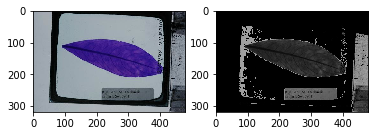

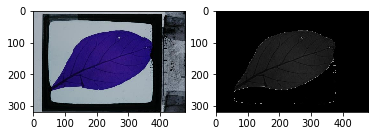

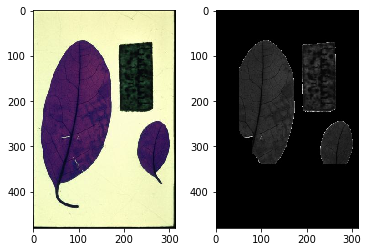

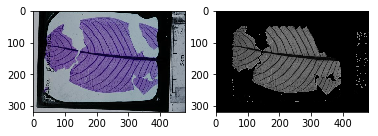

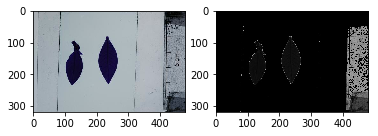

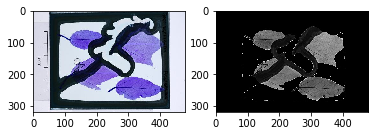

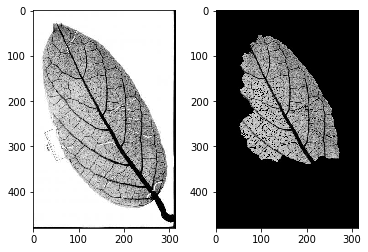

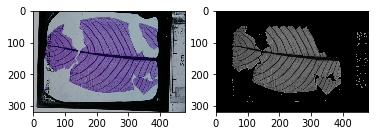

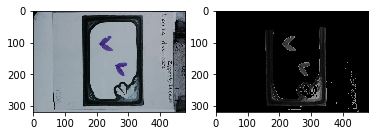

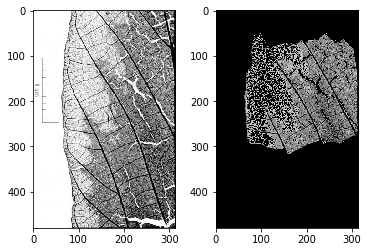

In [13]:
import random
random.seed(4)
randomList = [random.randint(1, 4769) for _ in range(10)] 


for num in randomList:
    try:
        greyimg = cv.imread(f"C:\\Users\\Qnouro\\Desktop\\Programming\\Scrapper\\leavesSegmented\\{num}.jpg")
    except cv2.error as e:
        print(f"The img doesn't exist : {e}!\n")
    
    try:
        rgbimg = cv.imread(f"C:\\Users\\Qnouro\\Desktop\\Programming\\Scrapper\\leavesDatabase\\{num}.jpg")
    except:
        print(f"Fatal error!\n")
    plt.subplot(1, 2, 2) #plotting side by side
    plt.imshow(greyimg)
    
    plt.subplot(1, 2, 1) 
    plt.imshow(rgbimg)
    plt.show()
    
